In [111]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.neighbors import KDTree

In [112]:
pre = np.array([2.222874402999878, 2.205129384994507, 2.1986029148101807, 2.1858696937561035, 2.1957268714904785, 2.1969168186187744, 2.183438539505005, 2.190436601638794, 2.1827948093414307, 2.1837754249572754, 2.2076597213745117, 2.177976131439209, 2.1731295585632324, 2.185473918914795, 2.1618497371673584, 2.1733145713806152, 2.181365728378296, 2.1715705394744873, 2.1802971363067627, 2.1772191524505615, 2.1959474086761475, 2.1840665340423584, 0.5597301125526428, 0.5485700964927673, 0.5352249145507812, 0.5243845582008362, 0.5171780586242676, 0.49347609281539917, 0.500745415687561, 0.5121733546257019, 0.5016278624534607, 0.5036090016365051, 0.5045422911643982, 0.5057468414306641, 0.48604974150657654, 0.4834277033805847, 0.49271881580352783, 0.4894062876701355, 0.47749894857406616, 0.47225064039230347, 0.47715726494789124, 0.48048126697540283, 0.4855308532714844, 0.4973067045211792, 0.4793863892555237, 0.4819462299346924, 0.4518357813358307, 0.48269888758659363, 0.4819696545600891, 0.4706280529499054, 0.4844808280467987, 0.4945412874221802, 0.5085427761077881, 0.49312782287597656, 0.500328540802002, 0.49513912200927734, 0.4999622404575348, 0.5043498277664185, 0.5245479345321655, 0.541199266910553, 0.5258843302726746, 0.5450403690338135, 0.5684719681739807, 1.9805926084518433, 1.992526888847351, 1.988566279411316, 2.026911735534668, 2.0081746578216553, 2.046605110168457, 2.0853240489959717, 2.075857162475586, 2.0827317237854004, 2.1258904933929443, 2.14408540725708, 2.169947624206543, 2.1946492195129395, 2.1616666316986084, 2.172661781311035, 2.154602289199829, 2.1330761909484863, 2.13897442817688, 2.137460470199585, 2.13767671585083, 2.098261594772339, 2.0943005084991455, 2.0957398414611816, 2.0956742763519287, 2.087766170501709, 2.091048002243042, 2.1002793312072754, 2.0828135013580322, 2.063037872314453, 2.0801477432250977, 2.062371015548706, 2.0871875286102295, 2.083261013031006, 2.0732927322387695, 2.08502197265625, 2.0588319301605225, 2.0332274436950684, 2.0723254680633545, 2.0552995204925537, 2.057854413986206, 2.069274663925171, 2.032874822616577, 2.0648837089538574, 2.072674512863159, 2.062706470489502, 2.045621633529663, 2.0590219497680664, 2.059302568435669, 2.0588607788085938, 2.0754079818725586, 2.0734634399414062, 2.0726094245910645, 2.0943069458007812, 2.0891125202178955, 2.0705318450927734, 2.0788536071777344, 2.10817289352417, 2.1069400310516357, 2.109229326248169, 2.101857900619507, 2.1055896282196045, 2.115345001220703, 2.119300127029419, 2.1327497959136963, 2.1400115489959717, 2.1617844104766846, 2.134272575378418, 2.146404266357422, 2.1694626808166504, 2.1619796752929688, 2.190279006958008, 2.1727895736694336, 1.1113004684448242, 1.100041389465332, 1.0575999021530151, 1.0355123281478882, 1.0419548749923706, 1.037386417388916, 1.0438101291656494, 0.994590163230896, 1.027056336402893, 1.0087417364120483, 1.0027227401733398, 1.0239629745483398, 1.0005853176116943, 1.017919659614563, 1.0248370170593262, 1.0239020586013794, 1.0181171894073486, 1.0272765159606934, 1.0323562622070312, 1.0463443994522095, 1.0655380487442017, 1.0990997552871704, 2.132075071334839, 2.1586179733276367, 2.149562358856201, 2.172996759414673, 2.202742576599121, 2.2174174785614014, 2.2322938442230225, 2.2515151500701904, 2.286550283432007, 2.2972664833068848, 2.330606698989868, 2.3576974868774414, 2.3825862407684326, 2.4172351360321045, 2.4361069202423096, 2.461888313293457, 2.5018298625946045, 2.4925389289855957, 2.4813530445098877, 2.452197313308716, 2.4803617000579834, 2.4636669158935547, 2.4398932456970215])

In [113]:
pre.shape

(180,)

In [114]:
def trans_to_isometry2d(R, t):
    res = np.eye(3)
    res[:2, :2] = R
    res[:2, 2] = t.squeeze()
    return res

In [115]:
def convert_scan_to_pointcloud(scan):
    """
    把激光消息转换为激光坐标系下的二维点云
    """
    angle_min=-1.0466699600219727
    angle_max=1.0466699600219727
    angle_increment=0.011629666201770306
    n = len(scan)
    pcs = []
    angle = angle_min
    for i in range(n):
#         print(scan[i])
        if scan[i] < 0.07999999821186066 or scan[i] > 6.0:
#             print(scan[i])
            continue
        angle += angle_increment
        # 计算单个值的三角函数，math比numpy的快
        lx = scan[i] * math.sin(angle)
        ly = scan[i] * math.cos(angle)
        if not lx or not ly:
            continue
#         pcs[i][0] = lx
#         pcs[i][1] = ly
        pcs.append((lx, ly))

    return np.array(pcs)

In [116]:
y_data_pre = convert_scan_to_pointcloud(pre)

In [117]:
y_data_pre.shape

(180, 2)

## 已知对应点关系的ICP

### 创造对应点的数据

In [123]:
# 创造数据
# 为已知的点云进行变换，假设为旋转pi/8,平移距离为t
theta = 3.1415926/8
t = np.array([0.5, 0.4])
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
y_data_now = (R @ y_data_pre.T).T + t
print("the rotation matrix should be:\n {}".format(R))

the rotation matrix should be:
 [[ 0.92387954 -0.38268343]
 [ 0.38268343  0.92387954]]


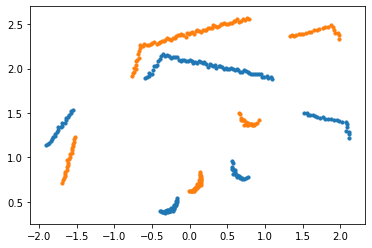

In [124]:
# 画出两点云
plt.scatter(y_data_pre[:,0], y_data_pre[:,1], marker='o', s=10)
plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=10)

### ICP数据匹配实验

In [125]:
# 通过匹配已知匹配的点云计算相对姿态
def icp(y_data_pre, y_data_now):
    """
    y_data_pre: shape=(n, 2)
    y_data_now: the same shape of y_data_pre = (n, 2)
    
    return: R and t. The transformation from pre to now
    """
    total_R = np.eye(3)
    
    pre_tm, now_tm = y_data_pre, y_data_now

    pre_t, now_t = pre_tm - np.mean(pre_tm, axis=0), now_tm - np.mean(now_tm, axis=0)

    W = np.zeros((2,2))

    for i in range(pre_t.shape[0]):
        W += pre_t[i:i+1].T @ now_t[i:i+1]

    U, sigma, V = np.linalg.svd(W)
    R = V @ U.T
    t = np.mean(now_tm, axis=0) - R@np.mean(pre_tm, axis=0).T
    
    return trans_to_isometry2d(R, t)

可以看见，通过ICP可以一次直接计算出来相对应的旋转关系。和我们之前设置的R和t保持一致

In [129]:
(icp(y_data_pre, y_data_now))

array([[ 0.92387954, -0.38268343,  0.5       ],
       [ 0.38268343,  0.92387954,  0.4       ],
       [ 0.        ,  0.        ,  1.        ]])

对y_data_pre进行旋转平移，后画图

In [130]:
y_data_from_icp = (icp(y_data_pre, y_data_now) @ np.hstack((y_data_pre, np.ones((y_data_pre.shape[0], 1)))).T).T

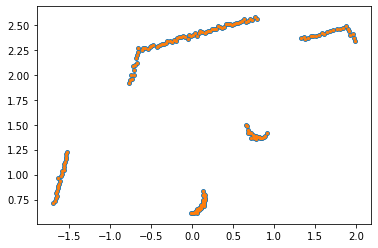

In [131]:
plt.scatter(y_data_from_icp[:,0], y_data_from_icp[:,1], marker='o', s=15)
plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=5)

In [132]:
# pre_tm, now_tm = y_data_pre, y_data_now

# pre_t, now_t = pre_tm - np.mean(pre_tm, axis=0), now_tm - np.mean(now_tm, axis=0)

# W = np.zeros((2,2))

# for i in range(pre_t.shape[0]):
#     W += pre_t[i:i+1].T @ now_t[i:i+1]

# U, sigma, V = np.linalg.svd(W)
# R = V @ U.T
# t = np.mean(now_tm, axis=0) - R@np.mean(pre_tm, axis=0).T

## 未知对应点关系的ICP

In [133]:
def find_correspend_point(y_data_pre, y_data_now):
    # 寻找对应点, 建立上一帧数据的KD树，循环下一帧的点
    # 寻找距离此点最近的在上一帧中的数据，保存到data_from_pre
    kdt = KDTree(y_data_now)
    data_from_now = []
    for point_idx in range(y_data_pre.shape[0]):
        point = y_data_pre[point_idx:point_idx+1]
        dist, idx = kdt.query(point, k=1)
        data_from_now.append(y_data_now[idx.squeeze()])
    return y_data_pre, data_from_now

In [134]:
def icpp(y_data_pre, y_data_now):
    """
    y_data_pre: shape=(n, 2)
    y_data_now: the same snow_tmhape of y_data_pre = (n, 2)
    
    return: R and t. The transformation from pre to now
    """
    total_R = np.eye(3)
    
    for j in range(50):
        pre_tm, now_tm = find_correspend_point(y_data_pre, y_data_now)
        
        pre_t, now_t = pre_tm - np.mean(pre_tm, axis=0), now_tm - np.mean(now_tm, axis=0)
        
        W = np.zeros((2,2))

        for i in range(pre_t.shape[0]):
            W += pre_t[i:i+1].T @ now_t[i:i+1]

        U, sigma, V = np.linalg.svd(W)
        R = V @ U.T
        t = np.mean(now_tm, axis=0) - R@np.mean(pre_tm, axis=0).T
        
        y_data_pre = (R @ pre_tm.T).T + t
        
        total_R = trans_to_isometry2d(R, t) @ total_R
        if j < 8:
            plt.subplot(3,3,j+1)
    #         y_data_from_icp = (total_R @ np.hstack((y_data_pre, np.ones((y_data_pre.shape[0], 1)))).T).T
            plt.scatter(y_data_pre[:,0], y_data_pre[:,1], marker='o', s=5)
            plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=1)
        angle = (np.arctan2(R[1, 0], R[0, 0])) * 180 / np.pi
        if angle < 0.01 and sum(t) < 0.01:
            print("iters:", j)
            break
    plt.subplot(3,3,9)
    plt.scatter(y_data_pre[:,0], y_data_pre[:,1], marker='o', s=5)
    plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=1)
    return total_R

In [135]:
icp(y_data_pre, y_data_now)

array([[ 0.92387954, -0.38268343,  0.5       ],
       [ 0.38268343,  0.92387954,  0.4       ],
       [ 0.        ,  0.        ,  1.        ]])

iters: 15


array([[ 0.92387954, -0.38268343,  0.5       ],
       [ 0.38268343,  0.92387954,  0.4       ],
       [ 0.        ,  0.        ,  1.        ]])

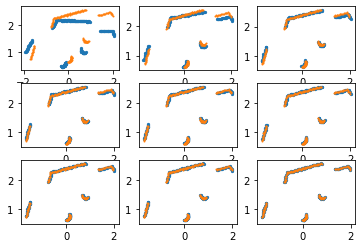

In [136]:
icpp(y_data_pre, y_data_now)

# 模拟一个转弯点云

In [165]:
data = dict()
pre = np.array([2.222874402999878, 2.205129384994507, 2.1986029148101807, 2.1858696937561035, 2.1957268714904785, 2.1969168186187744, 2.183438539505005, 2.190436601638794, 2.1827948093414307, 2.1837754249572754, 2.2076597213745117, 2.177976131439209, 2.1731295585632324, 2.185473918914795, 2.1618497371673584, 2.1733145713806152, 2.181365728378296, 2.1715705394744873, 2.1802971363067627, 2.1772191524505615, 2.1959474086761475, 2.1840665340423584, 0.5597301125526428, 0.5485700964927673, 0.5352249145507812, 0.5243845582008362, 0.5171780586242676, 0.49347609281539917, 0.500745415687561, 0.5121733546257019, 0.5016278624534607, 0.5036090016365051, 0.5045422911643982, 0.5057468414306641, 0.48604974150657654, 0.4834277033805847, 0.49271881580352783, 0.4894062876701355, 0.47749894857406616, 0.47225064039230347, 0.47715726494789124, 0.48048126697540283, 0.4855308532714844, 0.4973067045211792, 0.4793863892555237, 0.4819462299346924, 0.4518357813358307, 0.48269888758659363, 0.4819696545600891, 0.4706280529499054, 0.4844808280467987, 0.4945412874221802, 0.5085427761077881, 0.49312782287597656, 0.500328540802002, 0.49513912200927734, 0.4999622404575348, 0.5043498277664185, 0.5245479345321655, 0.541199266910553, 0.5258843302726746, 0.5450403690338135, 0.5684719681739807, 1.9805926084518433, 1.992526888847351, 1.988566279411316, 2.026911735534668, 2.0081746578216553, 2.046605110168457, 2.0853240489959717, 2.075857162475586, 2.0827317237854004, 2.1258904933929443, 2.14408540725708, 2.169947624206543, 2.1946492195129395, 2.1616666316986084, 2.172661781311035, 2.154602289199829, 2.1330761909484863, 2.13897442817688, 2.137460470199585, 2.13767671585083, 2.098261594772339, 2.0943005084991455, 2.0957398414611816, 2.0956742763519287, 2.087766170501709, 2.091048002243042, 2.1002793312072754, 2.0828135013580322, 2.063037872314453, 2.0801477432250977, 2.062371015548706, 2.0871875286102295, 2.083261013031006, 2.0732927322387695, 2.08502197265625, 2.0588319301605225, 2.0332274436950684, 2.0723254680633545, 2.0552995204925537, 2.057854413986206, 2.069274663925171, 2.032874822616577, 2.0648837089538574, 2.072674512863159, 2.062706470489502, 2.045621633529663, 2.0590219497680664, 2.059302568435669, 2.0588607788085938, 2.0754079818725586, 2.0734634399414062, 2.0726094245910645, 2.0943069458007812, 2.0891125202178955, 2.0705318450927734, 2.0788536071777344, 2.10817289352417, 2.1069400310516357, 2.109229326248169, 2.101857900619507, 2.1055896282196045, 2.115345001220703, 2.119300127029419, 2.1327497959136963, 2.1400115489959717, 2.1617844104766846, 2.134272575378418, 2.146404266357422, 2.1694626808166504, 2.1619796752929688, 2.190279006958008, 2.1727895736694336, 1.1113004684448242, 1.100041389465332, 1.0575999021530151, 1.0355123281478882, 1.0419548749923706, 1.037386417388916, 1.0438101291656494, 0.994590163230896, 1.027056336402893, 1.0087417364120483, 1.0027227401733398, 1.0239629745483398, 1.0005853176116943, 1.017919659614563, 1.0248370170593262, 1.0239020586013794, 1.0181171894073486, 1.0272765159606934, 1.0323562622070312, 1.0463443994522095, 1.0655380487442017, 1.0990997552871704, 2.132075071334839, 2.1586179733276367, 2.149562358856201, 2.172996759414673, 2.202742576599121, 2.2174174785614014, 2.2322938442230225, 2.2515151500701904, 2.286550283432007, 2.2972664833068848, 2.330606698989868, 2.3576974868774414, 2.3825862407684326, 2.4172351360321045, 2.4361069202423096, 2.461888313293457, 2.5018298625946045, 2.4925389289855957, 2.4813530445098877, 2.452197313308716, 2.4803617000579834, 2.4636669158935547, 2.4398932456970215])
y_data_pre = convert_scan_to_pointcloud(pre)
data[0] = y_data_pre

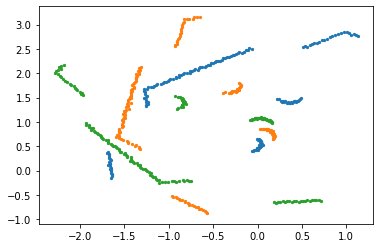

In [166]:
theta = np.pi / 4
t = np.array([0.5, 0.4])
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
n = 4
for i in range(1, n):
    y_data_now = (R @ y_data_pre.T).T + t
    data[i] = y_data_now
    y_data_pre = y_data_now
    plt.scatter(y_data_pre[:,0], y_data_pre[:,1], marker='o', s=5)
# plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=1)

## 画模拟的路径

In [167]:
def v2r(v):
    return np.array(
        [[np.cos(v[2]),-np.sin(v[2]),v[0]],
         [np.sin(v[2]),np.cos(v[2]),v[1]],
         [0,0,1]])
def r2v(r):
    return np.array([r[0, 2], r[1, 2], np.arctan2(r[1, 0], r[0, 0])])

[0.5        0.4        0.78539816]
[0.57071068 1.0363961  1.57079633]
[0.17071068 1.5363961  2.35619449]
[-0.46568542  1.60710678  3.14159265]


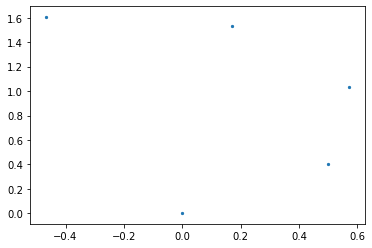

In [168]:
origin = [0, 0, 0]
origin_pose = v2r(origin)
rotation = trans_to_isometry2d(R, t)
path = [[0, 0]]
for i in range(n):
    now = origin_pose @ rotation
    now_vec = r2v(now)
    path.append(now_vec[:2])
    print(now_vec)
    origin_pose = now
path = np.array(path)  
plt.scatter(path[:,0], path[:,1], marker='o', s=5)

## 检测各个点之间的距离为设置了平移的距离

In [169]:
for i in range(n - 1):
    path_distance = (path[i, 1]-path[i+1, 1])**2 + (path[i, 0]-path[i+1, 0])**2
    truth_distance = t[0]**2 + t[1]**2
    assert(abs(path_distance - truth_distance) < 1e-6)


## 开始使用ICP来计算这组点云

In [170]:
len(data)

4

iters: 25


/tmp/ipykernel_8719/1700485359.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,j+1)
/tmp/ipykernel_8719/1700485359.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,j+1)
/tmp/ipykernel_8719/1700485359.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be crea

iters: 25


/tmp/ipykernel_8719/1700485359.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,9)
/tmp/ipykernel_8719/1700485359.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,j+1)
/tmp/ipykernel_8719/1700485359.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be create

iters: 25


/tmp/ipykernel_8719/1700485359.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,3,9)


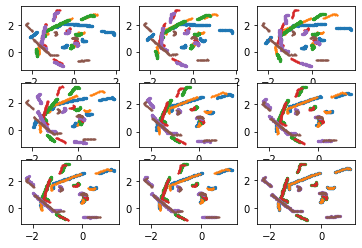

In [176]:
pre_laser_pose = np.array([0,0,0])
path = np.array([0,0, 0])
d = 1
# import pdb
for i in range(0, len(data)-d, d):
    y_data_pre, y_data_now = data[(i)], data[(i+d)]
#     y_data_pre, y_data_now = convert_scan_to_pointcloud(pre), convert_scan_to_pointcloud(now)
#     delta_iso = icp(y_data_now, y_data_pre)
    delta_iso = icpp(y_data_pre, y_data_now)
    pre_laser_pose = np.array([
                [np.cos(pre_laser_pose[2]), -np.sin(pre_laser_pose[2]), pre_laser_pose[0]],
                [np.sin(pre_laser_pose[2]), np.cos(pre_laser_pose[2]), pre_laser_pose[1]],
                [0 ,0 ,1]
            ])
    now_pose = pre_laser_pose @ delta_iso
    now_pose = np.array([now_pose[0, 2], now_pose[1, 2], np.arctan2(now_pose[1, 0], now_pose[0, 0])])
    path = np.vstack((path, now_pose))
    pre_laser_pose = now_pose


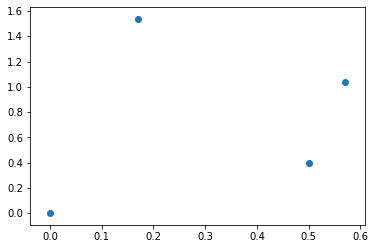

In [177]:
plt.scatter(path[:,0], path[:,1], marker='o')

In [178]:
path

array([[0.        , 0.        , 0.        ],
       [0.5       , 0.4       , 0.78539816],
       [0.57071068, 1.0363961 , 1.57079633],
       [0.17071068, 1.5363961 , 2.35619449]])

可见，计算出来的路径是木有问题的

## test for rotation

In [97]:
def find_correspend_point(y_data_pre, y_data_now):
    # 寻找对应点, 建立上一帧数据的KD树，循环下一帧的点
    # 寻找距离此点最近的在上一帧中的数据，保存到data_from_pre
    kdt = KDTree(y_data_now)
    data_from_now = []
    delete_idx = []
    for point_idx in range(y_data_pre.shape[0]):
        point = y_data_pre[point_idx:point_idx+1]
        dist, idx = kdt.query(point, k=1)
        if dist > 0.5:
            delete_idx.append(point_idx)
            continue
        
        data_from_now.append(y_data_now[idx.squeeze()])
        
        
    if delete_idx:
        delete_idx = np.array(delete_idx)
        y_data_pre = np.delete(y_data_pre, delete_idx, axis=0)
    
    
    return y_data_pre, np.array(data_from_now)

In [86]:
def icpp(y_data_pre, y_data_now):
    """
    y_data_pre: shape=(n, 2)
    y_data_now: the same snow_tmhape of y_data_pre = (n, 2)
    
    return: R and t. The transformation from pre to now
    """
    total_R = np.eye(3)
    
    for j in range(50):
        pre_tm, now_tm = find_correspend_point(y_data_pre, y_data_now)
        
        pre_t, now_t = pre_tm - np.mean(pre_tm, axis=0), now_tm - np.mean(now_tm, axis=0)
        
        W = np.zeros((2,2))

        for i in range(pre_t.shape[0]):
            W += pre_t[i:i+1].T @ now_t[i:i+1]

        U, sigma, V = np.linalg.svd(W)
        R = V @ U.T
        t = np.mean(now_tm, axis=0) - R@np.mean(pre_tm, axis=0).T
        
        y_data_pre = (R @ pre_tm.T).T + t

        
        total_R = trans_to_isometry2d(R, t) @ total_R
        
        angle = (np.arctan2(R[1, 0], R[0, 0])) * 180 / np.pi
        
        if abs(angle) < 0.0001 and sum(abs(t)) < 0.0001:
            print("iters:", j)
            plt.scatter(y_data_pre[:,0], y_data_pre[:,1], marker='o', s=5)
            plt.scatter(y_data_now[:,0], y_data_now[:,1], marker='o', s=1)
            break
    return total_R

# 加载数据

In [239]:
import json
with open("rotate_data.txt", "r") as f:
    data = json.loads(f.read())

# 计算每一帧的相对位姿，然后画出匹配的结果

iters: 12
iters: 11
iters: 17
iters: 17
iters: 15
iters: 23
iters: 16
iters: 14
iters: 22
iters: 25
iters: 17
iters: 41
iters: 27
iters: 38
iters: 32
iters: 32
iters: 49
iters: 31
iters: 28
iters: 7
iters: 14
iters: 23
iters: 38
iters: 33


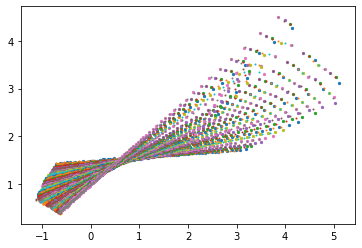

In [240]:
pre_laser_pose = np.array([0,0,0])
path = np.array([0,0,0])
d = 1
# import pdb
for i in range(0, len(data)-d, d):
    pre, now = data[str(i)], data[str(i+d)]
    y_data_pre, y_data_now = convert_scan_to_pointcloud(pre), convert_scan_to_pointcloud(now)
    delta_iso = icpp(y_data_now, y_data_pre)

    pre_laser_pose = np.array([
                [np.cos(pre_laser_pose[2]), -np.sin(pre_laser_pose[2]), pre_laser_pose[0]],
                [np.sin(pre_laser_pose[2]), np.cos(pre_laser_pose[2]), pre_laser_pose[1]],
                [0 ,0 ,1]
            ])
    now_pose = pre_laser_pose @ delta_iso
    now_pose = np.array([now_pose[0, 2], now_pose[1, 2], np.arctan2(now_pose[1, 0], now_pose[0, 0])])
    path = np.vstack((path, now_pose))
    pre_laser_pose = now_pose

    

In [241]:
now_pose

array([ 0.47241953,  0.77053834, -0.64904456])

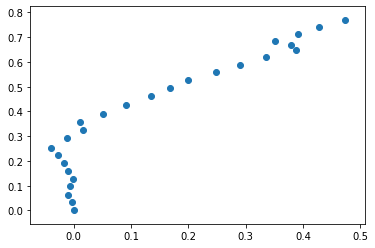

In [242]:
plt.scatter(path[:,0], path[:,1], marker='o')

# 根据之前保存的匹配结果（path）,全部画到第一帧

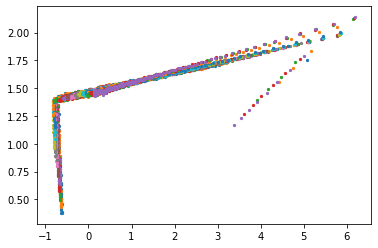

In [243]:
def v2r(v):
    return np.array(
        [[np.cos(v[2]),-np.sin(v[2]),v[0]],
         [np.sin(v[2]),np.cos(v[2]),v[1]],
         [0,0,1]])

# def plot_2d_ppint_cloud(path):
#     for p in range(len(path)):
#         d = data[3]
        
# plt.scatter(|data[:,0], data[:,1], marker='o', s=10)
d1 = convert_scan_to_pointcloud(data['0'])
count = 0
for i in range(0, len(data)-d, d):
#     count += 1
#     if count == 3:
#         break 
    d3 = convert_scan_to_pointcloud(data[str(i)])

    d2pre = (v2r(path[i//d]) @  np.hstack((d3, np.ones((d3.shape[0], 1)))).T).T
    d2pre = d2pre[:, :2]

    plt.scatter(d2pre[:,0], d2pre[:,1], marker='o', s=5)

# 计算单帧之间的匹配结果（用于自己测试）

In [204]:
path = np.array([0,0,0])
pre_laser_pose = [0, 0, 0]

iters: 12 1.4688641928870798e-14 [3.33066907e-16 2.22044605e-16]
iters: 11 6.6453046955242084e-15 [3.33066907e-16 2.22044605e-16]
iters: 0 -0.7674220708729579 [-0.01293727  0.00716884]
iters: 0 -0.9573455953522391 [-0.01880889  0.00748395]
iters: 0 -0.9361153031246865 [-0.02066819  0.0104725 ]
iters: 0 -0.9845571417663397 [-0.02217449  0.00945375]
iters: 0 -1.0207558942066683 [-0.02207986  0.00903967]
iters: 0 -1.107161873270908 [-0.02666401  0.00858379]
iters: 0 -1.1926197777498302 [-0.02397656  0.0109628 ]
iters: 0 -1.2532708078535268 [-0.02619588  0.01062395]
iters: 0 -1.3369339593900558 [-0.02927718  0.01004484]
iters: 0 -1.3605787538691636 [-0.03012126  0.01135017]
iters: 0 -1.4077407702391849 [-0.03069452  0.01338217]
iters: 0 -1.3508203356150505 [-0.02822784  0.0095328 ]
iters: 0 -1.4686138417518146 [-0.03075396  0.01205955]
iters: 0 -1.4212942985550419 [-0.02849701  0.00887177]
iters: 0 -1.3659636676784852 [-0.02700024  0.00797959]
iters: 0 -1.4159344833785774 [-0.0276784   0.0

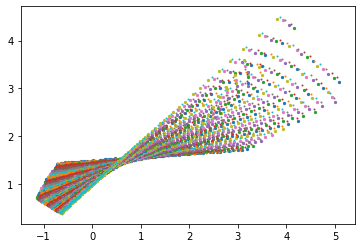

In [224]:
# idx = 50
for i in range(0, len(data)-1, d):
# i = 5
    if not len(pre) == len(now):
        print(i)
    pre, now = data[str(i)], data[str(i+d)]
    y_data_pre, y_data_now = convert_scan_to_pointcloud(pre), convert_scan_to_pointcloud(now)
    delta_iso = icpp(y_data_now, y_data_pre)

    pre_laser_pose = np.array([
                    [np.cos(pre_laser_pose[2]), -np.sin(pre_laser_pose[2]), pre_laser_pose[0]],
                    [np.sin(pre_laser_pose[2]), np.cos(pre_laser_pose[2]), pre_laser_pose[1]],
                    [0 ,0 ,1]
                ])
    now_pose = pre_laser_pose @ delta_iso
    now_pose = np.array([now_pose[0, 2], now_pose[1, 2], np.arctan2(now_pose[1, 0], now_pose[0, 0])])
    path = np.vstack((path, now_pose))
    pre_laser_pose = now_pose

In [222]:
len(pre) == len(now)

True